In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [3]:

df = pd.read_csv('Customer_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#No missing values on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df['international plan'] = df['international plan'].map({'no' : 0, 'yes': 1 })
df['voice mail plan'] = df['voice mail plan'].map({'yes' : 1, 'no':0 })
df['churn'] = df['churn'].map({False:0, True:1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
X = df.drop(columns=['state', 'phone number', 'churn'], axis=1)
y = df['churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## StandardScaler

In [12]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

## Logistic Regeression

In [13]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [14]:
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
scores

array([0.854     , 0.878     , 0.86      , 0.854     , 0.86172345])

In [15]:
print(f'R-sqaured:',lr.score(X_train_scaled, y_train))
print(f'accuracy_score:',accuracy_score(y_pred, y_test))
print(f'precision_score:',precision_score(y_pred, y_test))
print(f'recall_score:',recall_score(y_pred, y_test))
print(f'f1_score:',f1_score(y_pred, y_test))

R-sqaured: 0.8627450980392157
accuracy_score: 0.8585131894484412
precision_score: 0.184
recall_score: 0.5897435897435898
f1_score: 0.28048780487804875


In [16]:
mean_squared_error(y_test, y_pred)

0.14148681055155876

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[693,  16],
       [102,  23]])

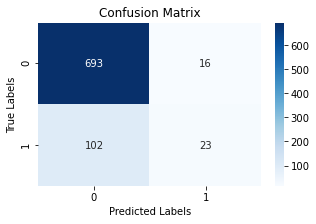

In [21]:
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

## KNN

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)
y_preddK = neigh.predict(X_test_scaled) 

In [ ]:
print(f'R-sqaured:',neigh.score(X_train_scaled, y_train))
print(f'accuracy_score:',accuracy_score(y_preddK, y_test))
print(f'precision_score:',precision_score(y_preddK, y_test))
print(f'recall_score:',recall_score(y_preddK, y_test))
print(f'f1_score:',f1_score(y_preddK, y_test))

R-sqaured: 0.9203681472589036
accuracy_score: 0.8848920863309353
precision_score: 0.312
recall_score: 0.7959183673469388
f1_score: 0.44827586206896547


In [ ]:
mean_squared_error(y_test, y_preddK)

0.11510791366906475

In [ ]:
scores = cross_val_score(neigh, X_train_scaled, y_train, cv=5)
scores

array([0.88      , 0.894     , 0.898     , 0.882     , 0.87775551])

In [ ]:
cm = confusion_matrix(y_test, y_preddK)
cm

array([[699,  10],
       [ 86,  39]])

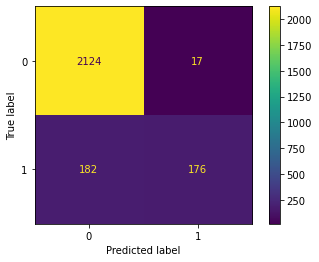

In [ ]:
plot_confusion_matrix(neigh, X_train_scaled, y_train);

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_scaled, y_train)
y_preD = dt.predict(X_test_scaled)


In [ ]:
print(f'R-sqaured:',dt.score(X_train_scaled, y_train))
print(f'accuracy_score:',accuracy_score(y_preD, y_test))
print(f'precision_score:',precision_score(y_preD, y_test))
print(f'recall_score:',recall_score(y_preD, y_test))
print(f'f1_score:',f1_score(y_preD, y_test))

R-sqaured: 1.0
accuracy_score: 0.9220623501199041
precision_score: 0.76
recall_score: 0.7307692307692307
f1_score: 0.7450980392156863


In [ ]:
scores = cross_val_score(dt, X_train_scaled, y_train, cv=5)
scores

array([0.894     , 0.906     , 0.922     , 0.914     , 0.92184369])

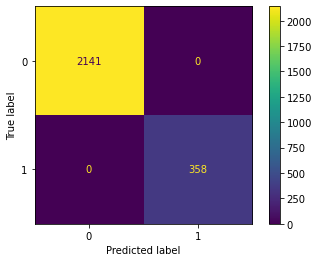

In [ ]:
cm = confusion_matrix(y_test, y_preD)
plot_confusion_matrix(dt, X_train_scaled, y_train);

## Hyperparameter Tuning

In [ ]:
dt_tuned = DecisionTreeClassifier(random_state=1, max_depth=4)
dt_tuned.fit(X_train_scaled, y_train)
y_preDT = dt_tuned.predict(X_test_scaled)



In [ ]:
print(f'R-sqaured:',dt_tuned.score(X_train_scaled, y_train))
print(f'accuracy_score:',accuracy_score(y_preDT, y_test))
print(f'precision_score:',precision_score(y_preDT, y_test))
print(f'recall_score:',recall_score(y_preDT, y_test))
print(f'f1_score:',f1_score(y_preDT, y_test))

R-sqaured: 0.9303721488595438
accuracy_score: 0.9136690647482014
precision_score: 0.52
recall_score: 0.8441558441558441
f1_score: 0.6435643564356436


In [ ]:
scores = cross_val_score(dt_tuned, X_train_scaled, y_train, cv=5)
scores

array([0.902     , 0.918     , 0.922     , 0.924     , 0.92785571])

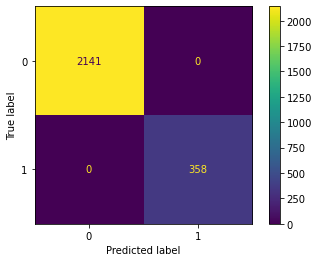

In [ ]:
cm = confusion_matrix(y_test, y_preDT)
plot_confusion_matrix(dt, X_train_scaled, y_train);

## Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_predrf = rf_classifier.predict(X_test_scaled)


In [ ]:
print(f'R-sqaured:',rf_classifier.score(X_train_scaled, y_train))
print(f'accuracy_score:',accuracy_score(y_predrf, y_test))
print(f'precision_score:',precision_score(y_predrf, y_test))
print(f'recall_score:',recall_score(y_predrf, y_test))
print(f'f1_score:',f1_score(y_predrf, y_test))

R-sqaured: 1.0
accuracy_score: 0.9448441247002398
precision_score: 0.68
recall_score: 0.9340659340659341
f1_score: 0.7870370370370372


In [ ]:
scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
scores

array([0.95      , 0.946     , 0.954     , 0.952     , 0.95991984])

In [ ]:
#scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
 #                             ('knn', KNeighborsClassifier())])

In [ ]:
#scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
#scaled_pipeline_1.score(X_test, y_test)

In [ ]:
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

In [ ]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [ ]:
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [ ]:
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.919664268585132